## 3.5 Ejercicios

### Ejercicio 3.1: Escribir una función de conversión Fahrenheit-Celsius


La fórmula para convertir grados Fahrenheit a grados Celsius

$$
C = \frac{5}{9}(F - 32)
$$

Escribe una función $C(F)$ que implemente esta fórmula. Para verificar la implementación, puede usar $F(C)$ de la Sección 3.1.1 y probar que 
C(F(c)) es igual a c.

**Consejo**. No pruebe C(F(c)) == c exactamente, pero use una tolerancia para la diferencia.
**Nombre de archivo: f2c.py.**

### Ejercicio 3.2: Evaluar una suma y escribir una función de prueba

**a)** Escriba una función de Python sum_1k(M) que devuelva la suma 

$$
s = \sum_{k=1}^M \frac{1}{k}
$$

**b)** Calcule s para M=3 a mano y escriba otra función **test_sum_1k()** que llame a **sum_1k(3)** y verifique que la respuesta sea correcta.

**Consejo**. Recomendamos que **test_sum_1k** siga las convenciones de los marcos de prueba de pytest y nose tal como se explica en las Secciones 3.3.3 y 3.4.2 (vea también la Sección H.6). Significa establecer un éxito de variable booleana en True si la prueba pasa, de lo contrario es Falso. El siguiente paso es hacer valer el éxito, que abortará el programa con un mensaje de error si la salida es False y la prueba falló. Para proporcionar un mensaje de error informativo,
puede agregar su propio mensaje de cadena **msg:assert success**, **msg**. Nombre de archivo: **sum_func.py.**

### Ejercicio 3.3: Escribe una función para resolver $ax^2 + bx + c = 0$

**a)** Dada una ecuación cuadrática $ax^2 + bx + c = 0$, escribe una función **roots(a, b, c)** que devuelve las dos raíces de la ecuación. Las raíces devueltas deben ser objetos `float` cuando las raíces son reales, de lo contrario, la función devuelve objetos `complex`.

**Consejo**. Use `sqrt` de la biblioteca `numpy.lib.scimath`, vea el Capítulo 1.6.3.

**b)** Construya dos casos de prueba con soluciones conocidas, uno con raíces reales y el otro con raíces complejas. Implemente los dos casos de prueba en dos funciones de prueba **test_roots_float** y **test_roots_complex**, donde llame a la función de raíces y verifique el tipo y valor de los objetos devueltos .

**Nombre de archivo: roots_quadratic.py.**

### Ejercicio 3.4: Implementar la función de suma

La función estándar de Python llamada `sum` toma una lista como argumento y calcula la suma de los elementos de la lista:

In [7]:
sum([1,3,5,-5])

4

Implementa tu propia versión de suma.
**Nombre de archivo: mysum.py.**

### Ejercicio 3.5: Calcular un polinomio a través de un producto

Dados $n + 1$ raíces $r0, r1, ..., rn$ de un polinomio $p(x)$ de grado 
$n+1$, $p(x)$ se puede calcular mediante


$$
p(x) = \prod\limits_{i=0}^{n}(x-r_i)=(x-r_0)(x-r_1)...(x-r_{n-1}(x-r_n))
$$

Escriba una función **poly(x, roots)** que tome $x$ y una lista **roots** de las raíces como argumentos y devuelva $p(x)$. Construye un caso de prueba para verificar la implementación. **Nombre de archivo: polyprod.py.**

In [15]:
roots = [-1, 1, 2]

def poly(roots, x):
    p = 1
    for i in range(len(roots)):
        p *= (x - roots[i])
    return p

print (poly(roots, 3))

8


### Ejercicio 3.6: Integrar una función por la regla trapezoidal

**a)** Una aproximación a la integral de una función f (x) sobre un intervalo [a, b] se puede encontrar al aproximar f (x) por la línea recta que recorre los puntos finales (a, f (a)) y (b, f (b)), y luego encuentra el área debajo de la línea recta, que es el área de un trapecio. La fórmula resultante se convierte en

$$
\int\limits_{a}^{b} f(x)dx = \frac{b-a}{2}(f(a)+f(b))
$$

Escriba una función **trapezint1(f,a,b)** que devuelva esta aproximación a la integral. El argumento **f** es una implementación de Python $f(x)$ de la función matemática $f(x)$.

In [18]:
from scipy.integrate import quad
from scipy import exp, pi, cos, sin, log


def trapezint(f, a, b, n):
    s = (f(a) + f(b)) / 2
    h = (b - a) / float(n)
    for i in range(1, n):
        s += f(a + i * h)
    s *= h
    return s

f1 = [exp, 0, log(3)]
f2 = (cos, 0, pi)
f3 = (sin, 0, pi)
f4 = (sin, 0, pi / 2)

functions = [f1, f2, f3, f4]


def verify(f, a, b, n):
    exact = quad(f, a, b)[0]
    approx = trapezint(f, a, b, n)
    error = abs(exact - approx)
    print ('The exact integral of %s between %.5f and %.5f is %.5f. \
           The approximate answer is %.5f giving an error of %.5f' \
        % (f.__name__, a, b, exact, approx, error))

for f in functions:
    verify(f[0], f[1], f[2], 10)

The exact integral of exp between 0.00000 and 1.09861 is 2.00000.            The approximate answer is 2.00201 giving an error of 0.00201
The exact integral of cos between 0.00000 and 3.14159 is 0.00000.            The approximate answer is 0.00000 giving an error of 0.00000
The exact integral of sin between 0.00000 and 3.14159 is 2.00000.            The approximate answer is 1.98352 giving an error of 0.01648
The exact integral of sin between 0.00000 and 1.57080 is 1.00000.            The approximate answer is 0.99794 giving an error of 0.00206


**b)** Use la aproximación (3.9) para calcular las siguientes integrales:
$\int\limits_{0}^{\pi} \cos x dx \int\limits_{0}^{\pi} \sin x dx$ $\int\limits_{0}^{\pi/2} \sin x dx$ En cada caso, escribir el error
es decir, la diferencia entre la integral exacta y la aproximación (3.9). Haz bocetos del trapecio de cada integral para que 
Comprender cómo se comporta el método en los diferentes casos.

**c)** Podemos mejorar fácilmente la fórmula (3.9) al aproximar el área bajo la función f (x) mediante dos trapecios de igual tamaño. Derive una fórmula para esta aproximación e implementarla en una función **trapezint2(f,a,b)**. Ejecute los ejemplos de b) y vea cuánto mejor es la nueva fórmula. Haz bocetos de los dos trapezoides en cada caso.


**d)** Una mejora adicional del método de integración aproximado de c) es dividir el área bajo la curva f (x) en n trapecios de igual tamaño. Basándose en esta idea, derive la siguiente fórmula para aproximar la integral:

$$
\int\limits_{a}^{b} f(x)dx = \sum_{0=1}^{n-1} \frac{1}{2}h(f(x_1)+f(x_{1+1}))
$$

donde h es el ancho de los trapecios, $h=(b-a)/n$, and $x_i=a+ih$, $i=0$,. . . , $n$, son las coordenadas de los lados de los trapezoides.

La siguiente figura visualiza la idea de la regla trapezoidal.

![Captura%20de%20pantalla%202019-05-02%20a%20las%202.29.32%20p.m..png](attachment:Captura%20de%20pantalla%202019-05-02%20a%20las%202.29.32%20p.m..png)

Implementar (3.10) en una función de python **trapezint(f, a, b, n)**. Ejecute los ejemplos de b) con n = 10.


In [20]:
from scipy.integrate import quad
from scipy import exp, pi, cos, sin, log


def trapezint(f, a, b, n):
    s = (f(a) + f(b)) / 2
    h = (b - a) / float(n)
    for i in range(1, n):
        s += f(a + i * h)
    s *= h
    return s

f1 = [exp, 0, log(3)]
f2 = (cos, 0, pi)
f3 = (sin, 0, pi)
f4 = (sin, 0, pi / 2)

functions = [f1, f2, f3, f4]


def verify(f, a, b, n):
    exact = quad(f, a, b)[0]
    approx = trapezint(f, a, b, n)
    error = abs(exact - approx)
    print ('The exact integral of %s between %.5f and %.5f is %.5f. \
           The approximate answer is %.5f giving an error of %.5f' \
        % (f.__name__, a, b, exact, approx, error))

for f in functions:
    verify(f[0], f[1], f[2], 10)

The exact integral of exp between 0.00000 and 1.09861 is 2.00000.            The approximate answer is 2.00201 giving an error of 0.00201
The exact integral of cos between 0.00000 and 3.14159 is 0.00000.            The approximate answer is 0.00000 giving an error of 0.00000
The exact integral of sin between 0.00000 and 3.14159 is 2.00000.            The approximate answer is 1.98352 giving an error of 0.01648
The exact integral of sin between 0.00000 and 1.57080 is 1.00000.            The approximate answer is 0.99794 giving an error of 0.00206


**e)** Escriba una función de prueba **test_trapezint()** para verificar la implementación de la función de **trapezint** en d).

**Consejo** Obviamente, el método Trapezoidal integra funciones lineales.
exactamente para cualquier n. Otro resultado más sorprendente es que el método es also exact for, e.g., $\int\limits_{0}^{\pi} \cos x dx$ for any n

**Filename:trapezint.py**

**Observaciones**. La fórmula (3.10) no es la forma más común de expresar la regla de integración trapezoidal. La razón es que $f(xi+1)$ se evalúa dos veces, primero en el término i y luego como $f(x_i)$ en el término i + 1. La fórmula puede desarrollarse aún más para evitar evaluaciones innecesarias de $f(x_i + 1)$, que resultados en la forma estándar

$$
\int\limits_{a}^{b} f(x)dx =, \frac{1}{2}h(f(a)+f(b)) +h\sum_{i=1}^{n-1}f(x_i)
$$


### Ejercicio 3.7: Derivar la regla general de integración del punto medio

La idea de la regla del punto medio para la integración es dividir el área bajo la curva $f(x)$ en n rectángulos de igual tamaño (en lugar de trapecios como en el **Ejercicio 3.6).** La altura del rectángulo está determinada por el valor de f en el punto medio del rectángulo. La siguiente figura ilustra la idea.

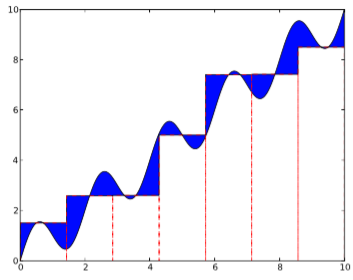

Calcule el área de cada rectángulo, resúmalos y llegue a la fórmula para la regla del punto medio:

$$
\int\limits_{a}^{b} f(x)dx \approx h\sum_{i=0}^{n-1} f(a+ih+ \frac{1}{2}h)
$$

donde h = (b a) / n es el ancho de cada rectángulo. Implemente esta fórmula en una función de Python **midpointint(f, a, b, n)** y pruebe la función en los ejemplos enumerados en el Ejercicio 3.6b. ¿Cómo se comparan los errores en la regla del midpointint con los de la regla trapezoidal para n = 1 y n = 10? **Nombre de archivo: midpointint.py.**

### Ejercicio 3.8: Hacer una regla trapezoidal adaptativa

Un problema con la regla de integración Trapezoidal (3.10) en el Ejercicio 3.6 es decidir cuántos trapecios (n) usar para lograr la precisión deseada. Sea **E** el error en el método trapezoidal, es decir, la diferencia entre la integral exacta y la producida por (3.10). Nos gustaría prescribir una (pequeña) tolerancia y encontrar una n tal que E<=e

Dado que el valor exacto $\int\limits_{a}^{b} f(x)dx$ no está disponible (¡es por eso que usamos un método numérico!), Es un desafío calcular la **E**. Sin embargo, los matemáticos han demostrado que

$$
E\leq \frac{1}{12}(b-a)h^2max|f´´(x)|
$$

El máximo de |f´´(x)| se puede calcular (aproximadamente) evaluando f´´(x) en un gran número de puntos en (a, b), tomando el valor absoluto | f´´ (x) |, y encontrando el valor máximo de estos. La doble derivada se puede calcular mediante una fórmula de diferencia finita:

$$
f´´(x) \approx \frac{f(x+h) - 2f(x)+f(x-h)}{h^2}
$$

Con la estimación calculada de max |f´´(x)| podemos encontrar h desde la configuración del lado derecho en (3.13) igual a la tolerancia deseada:

$$
\frac{1}{12}(b-a)h^2 \max\limits_{x\in [a,b]} |f´´(x)|=\in
$$

Resolviendo con respecto a h da

$$
h = \sqrt{12\epsilon} ((b-a) \max\limits_{x\in[a,b]}|f´´(x)|)^\frac{-1}{2} 
$$

Con $n=(b-a)/h$ tenemos la n que corresponde a la deseada exactitud $\epsilon$




**a)** Haga una función de Python **adaptive_trapezint(f,a,b, eps=1E-5)** para calcular la integral $\int\limits_{a}^{b} f(x)dx$ con un error menor o igual a
(eps).

**Consejo** Calcule la n correspondiente a lo explicado anteriormente y llame trapecio (f, a, b, n) del ejercicio 3.6.

**b)** Aplique la función para calcular las integrales del ejercicio 3.6b. Escriba el error exacto y la n estimada para cada caso.
Nombre de archivo: **adaptive_trapezint.py.**

**Observaciones.** Un método numérico que aplica una expresión para que el error adapte la elección del parámetro de discretización a una tolerancia de error deseada, se conoce como un método numérico adaptativo. La ventaja de un método adaptativo es que uno puede controlar el error de aproximación, y no es necesario que el usuario determine un número apropiado de intervalos n.